In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

custom_params = {"xtick.minor.visible": True,
                 "xtick.major.pad":5,
                 "xtick.direction":"in",
                 "xtick.top":True,
                 "ytick.minor.visible": True,
                 "ytick.direction":"in",
                 "ytick.right":True,
                 "font.family":"Helvetica",
                 "font.size":12.0,
                 "legend.frameon":False,
                 "legend.labelspacing":0}

sns.set_theme(style='ticks', rc=custom_params)

In [2]:
# import
csv_name = "iac_exoplanet_atmospheres-20231114.csv"
data = pd.read_csv(csv_name, delimiter=';')

### Detections of Exoplanet Atmospheres

In [3]:
# Replace 'G-B....' with 'Ground Based'
data['observation_type'] = data['observation_type'].replace(r'G-B.*', 'Ground Based', regex=True)

# Replace anything including 'JWST' with 'JWST'
data['observation_type'] = data['observation_type'].replace(r'.*JWST.*', 'JWST', regex=True)

# Replace anything including 'HST' with 'HST'
data['observation_type'] = data['observation_type'].replace(r'.*HST.*', 'HST', regex=True)

In [4]:
detections = data.groupby('observation_type')['name'].count().sort_values().reset_index()
detections


,observation_type,name
0,Direct Detection,2
1,CHEOPS,6
2,Spitzer,28
3,JWST,30
4,TESS,31
5,HST,129
6,Ground Based,342


### Water in Exoplanet Atmospheres

In [5]:
water_planets = data[data['molecules'].str.contains('H2O":"Detection"')]
water_planets = water_planets[water_planets['planet_status']=='Confirmed']


In [6]:
number = water_planets.name.value_counts()
print(f'Number of exoplanets w/ water detected = {len(number)}')
print(f'Number with water detected at least twice = {len(number[number.values>1])}')

Number of exoplanets w/ water detected = 60
Number with water detected at least twice = 30


In [7]:
water_planets['mass_E'] = water_planets['mass']*317.8
water_planets['radius_E'] = water_planets['radius']*10.98

In [8]:
water_planets['NASA_category'] = None
water_planets.loc[water_planets['radius_E']>=7, 'NASA_category'] = 'Gas Giant'
water_planets.loc[(water_planets['radius_E']<7) & (water_planets['radius_E']>2), 'NASA_category'] = 'Neptune-like'
water_planets.loc[(water_planets['radius_E']<2) & (water_planets['mass_E']>1), 'NASA_category'] = 'Super-Earth'
water_planets.loc[(water_planets['radius_E']<2) & (water_planets['mass_E']<=1), 'NASA_category'] = 'Terrestrial'

In [9]:
water_planets = water_planets.drop_duplicates('name').groupby('name').agg({'molecules':lambda x: ' '.join(map(str, x)),
                                                   'NASA_category':lambda x: ' '.join(map(str, x)),
                                                   'type':lambda x: ' '.join(map(str, x))}).reset_index()

In [10]:
for x in range(len(water_planets)):
    if water_planets.loc[x].type == 'UltraHot Jupiter':
        water_planets.loc[x,'type'] = 'Ultra-Hot\nJupiter'
    elif water_planets.loc[x].type == 'Hot Jupiter':
        water_planets.loc[x,'type'] = 'Hot\nJupiter'
    elif water_planets.loc[x].type == 'Jupiter':
        water_planets.loc[x,'type'] = 'Gas\nGiant'
    elif water_planets.loc[x].type == 'UltraHot':
        water_planets.loc[x,'type'] = 'Ultra-Hot\nNeptune'
    elif water_planets.loc[x].type == 'Hot':
        water_planets.loc[x,'type'] = 'Hot\nNeptune'
    elif water_planets.loc[x,'type'] == 'Temperate':
        if water_planets.loc[x].NASA_category == 'Neptune-like':
            water_planets.loc[x,'type'] = 'Temperate\nNeptune'
        else: water_planets.loc[x,'type'] = 'Temperate\nSuper-Earth'
    elif water_planets.loc[x].type == 'Warm':
        if water_planets.loc[x].NASA_category == 'Neptune-like':
            water_planets.loc[x,'type'] = 'Warm\nNeptune'
        else: water_planets.loc[x,'type'] = 'Warm\nSuper-Earth'

In [11]:
exoplanets_palette = {'Temperate\nSuper-Earth':'hotpink',
         'Warm\nSuper-Earth':'deeppink',
         'Temperate\nNeptune':'lightskyblue',
         'Warm\nNeptune':'skyblue',
         'Hot\nNeptune':'deepskyblue',
         'Ultra-Hot\nNeptune':'steelblue',
         'Gas\nGiant':'gold',
         'Hot\nJupiter':'orange',
         'Ultra-Hot\nJupiter':'darkorange'}

In [12]:
grouped_data = water_planets.groupby('type')['name'].count().sort_values()
print(grouped_data)

type
Temperate\nSuper-Earth     1
Ultra-Hot\nNeptune         1
Warm\nSuper-Earth          1
Hot\nNeptune               2
Temperate\nNeptune         2
Warm\nNeptune              2
Gas\nGiant                 3
Ultra-Hot\nJupiter        12
Hot\nJupiter              36
Name: name, dtype: int64


C:\Users\ocram\AppData\Local\Temp\ipykernel_26568\452814966.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_data, ax=ax, order=exoplanets_palette.keys(), palette=exoplanets_palette)


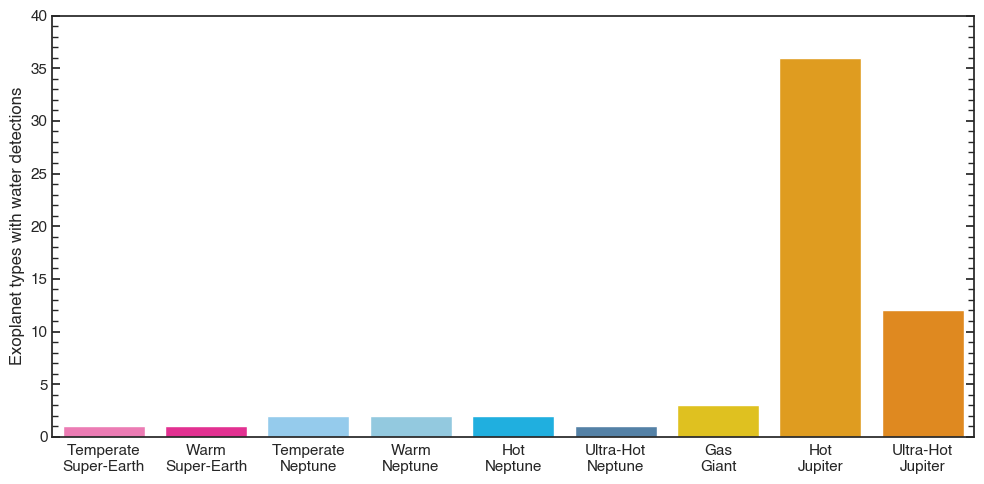

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
sns.barplot(data=grouped_data, ax=ax, order=exoplanets_palette.keys(), palette=exoplanets_palette)
ax.xaxis.set_tick_params(which='both', top=False, bottom=False)

# Add labels and title
plt.ylim(0,40)
plt.xticks(rotation='horizontal')
plt.xlabel(None)
plt.ylabel('Exoplanet types with water detections')
plt.tight_layout()

plt.savefig('Water_Detections_Categories', dpi=200)

In [14]:
grouped_data

type
Temperate\nSuper-Earth     1
Ultra-Hot\nNeptune         1
Warm\nSuper-Earth          1
Hot\nNeptune               2
Temperate\nNeptune         2
Warm\nNeptune              2
Gas\nGiant                 3
Ultra-Hot\nJupiter        12
Hot\nJupiter              36
Name: name, dtype: int64

### Presentation Plot

In [26]:
exowater_dict = {'Temperate &\nWarm Super-Earths':2,
                 'Temperate &\nWarm Neptunes':4,
                 'Temperate\nGas Giants':3,
                 'Ultra Hot- &\nHot-Neptunes':3,
                 'Ultra Hot- &\nHot-Jupiters':48}

Text(0.5, 1.0, 'Exoplanet Types with Water Detections')

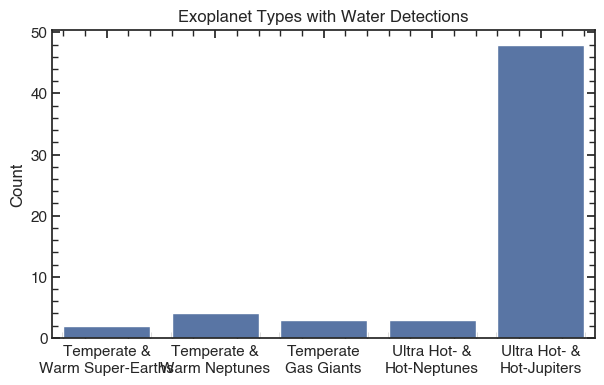

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.barplot(exowater_dict, ax=ax)
ax.set_ylabel('Count')
plt.title('Exoplanet Types with Water Detections')
#plt.xticks(rotation=45)
